<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/sampling_generate_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# numpy.random.normal(loc=0.0, scale=1.0, size=None)
# generate sample of 200 values that follow a normal distribution 
# data = normal(loc=0, scale=1, size=200)

data = pd.DataFrame({"zt1" : normal(0, 1, 500000),
                     "zt2" : normal(0, 1, 500000),
                     "zt3" : normal(0, 1, 500000)})
data

,zt1,zt2,zt3
0,1.592363,0.358160,-1.111787
1,-0.694807,-0.513121,1.932765
2,2.327621,-0.445061,0.006169
3,0.601927,-2.322394,-1.060958
4,1.207929,-0.526264,2.135410
...,...,...,...
499995,0.495764,0.023498,-0.090723
499996,-0.940342,-0.951801,-1.162061
499997,-0.757080,-1.092271,1.863130
499998,1.087642,-1.351757,-0.027273


In [16]:
n=50
rep=0
table_data_all=pd.DataFrame({"rep":[]})
data_copy=data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:]
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy()
        data_copy=pd.DataFrame({"":[]})
    #=========================
    p = 0

    Zt1 = data_new['zt1']
    Zt2 = data_new['zt2']
    Zt3 = data_new['zt3']

    xt1 = (1-(p**2))**(1/2)*Zt1
    xt2 = (1-(p**2))**(1/2)*Zt2
    xt3 = (1-(p**2))**(1/2)*Zt3

    new_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                             'Xt2' : data_new['zt2'],
                             'Xt3' : data_new['zt3'],
                             'e'   : normal(0, xt2**6, n)})


    table_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                               'Xt2' : data_new['zt2'],
                               'Xt3' : data_new['zt3'],
                               'e'   : new_data['e']})
  

    table_data['Y'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']+table_data['e']
    #table_data['Y_hat'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    # display(table_data)
    rep+=1
    if rep==1000:
      break
table_data_all=table_data_all.set_index(["rep","index"])
table_data_all

Xt1       Xt2       Xt3          e          Y
rep   index                                                    
0.0   0.0   -0.364168  1.221931  0.174778   0.438532   6.754960
      1.0   -0.871383  1.890840  0.047738  67.508425  74.167990
      2.0    0.732096  0.596684  1.814009  -0.032787  11.685510
      3.0    1.263921  0.275339 -0.781432  -0.000164   2.105256
      4.0    0.027949 -1.541948  0.407906   4.338150   7.504868
...               ...       ...       ...        ...        ...
999.0 45.0  -1.119721 -0.461460  1.666033  -0.005208   8.852432
      46.0  -0.321609 -0.164048 -0.249518  -0.000005   2.727016
      47.0  -1.292995  1.811754  0.560025  44.793416  53.009939
      48.0   0.664963  0.139654  0.675519  -0.000021   6.907314
      49.0   1.716355  1.666190 -1.935971 -15.854264 -15.637933

[50000 rows x 5 columns]

In [17]:
x = table_data_all[['Xt1', 'Xt2', 'Xt3',]]
y = table_data_all['Y']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

In [18]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df

Actual  Predicted
rep   index                      
0.0   0.0     6.754960   8.617008
      1.0    74.167990  10.346340
      2.0    11.685510  11.494733
      3.0     2.105256   3.234900
      4.0     7.504868   0.121998
...                ...        ...
999.0 45.0    8.852432   6.955567
      46.0    2.727016   2.778151
      47.0   53.009939  11.401043
      48.0    6.907314   6.718482
      49.0  -15.637933   4.774296

[50000 rows x 2 columns]

In [19]:
table_data_new = pd.DataFrame({'Xt1'   : table_data_all['Xt1'],
                               'Xt2'   : table_data_all['Xt2'],
                               'Xt3'   : table_data_all['Xt3'],
                               'e'     : table_data_all['e'],
                               'Y'     : df['Actual'],
                               'y_hat' : df['Predicted']})
table_data_new['e_hat'] = table_data_new['Y']-table_data_new['y_hat']
table_data_new

Xt1       Xt2       Xt3  ...          Y      y_hat      e_hat
rep   index                                ...                                 
0.0   0.0   -0.364168  1.221931  0.174778  ...   6.754960   8.617008  -1.862048
      1.0   -0.871383  1.890840  0.047738  ...  74.167990  10.346340  63.821650
      2.0    0.732096  0.596684  1.814009  ...  11.685510  11.494733   0.190777
      3.0    1.263921  0.275339 -0.781432  ...   2.105256   3.234900  -1.129645
      4.0    0.027949 -1.541948  0.407906  ...   7.504868   0.121998   7.382871
...               ...       ...       ...  ...        ...        ...        ...
999.0 45.0  -1.119721 -0.461460  1.666033  ...   8.852432   6.955567   1.896865
      46.0  -0.321609 -0.164048 -0.249518  ...   2.727016   2.778151  -0.051135
      47.0  -1.292995  1.811754  0.560025  ...  53.009939  11.401043  41.608896
      48.0   0.664963  0.139654  0.675519  ...   6.907314   6.718482   0.188831
      49.0   1.716355  1.666190 -1.935971  ... -15.637933   4.774296 -20.412230

[50000 rows x 7 columns]

In [20]:
table_data_new.to_csv('sampling_1000rep_n50_2020.csv')
files.download('sampling_1000rep_n50_2020.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
table_data_new.mean()

Xt1      2.105180e-02
Xt2     -1.705563e-02
Xt3     -2.292651e-02
e        1.743401e+00
Y        5.643703e+00
y_hat    5.643703e+00
e_hat   -7.943868e-16
dtype: float64

In [12]:
table_data_new.var()

Xt1         0.995200
Xt2         1.000862
Xt3         1.022290
e        8218.197550
Y        8238.915702
y_hat      22.244703
e_hat    8216.670999
dtype: float64

In [13]:
# Compute pairwise correlation of columns, excluding NA/null values.
table_data_new.corr()

,Xt1,Xt2,Xt3,e,Y,y_hat,e_hat
Xt1,1.000000e+00,-2.427998e-02,9.073942e-03,0.004274,0.008627,1.660359e-01,6.539180e-17
Xt2,-2.427998e-02,1.000000e+00,-1.672893e-03,0.012682,0.029025,5.585855e-01,-2.973305e-17
Xt3,9.073942e-03,-1.672893e-03,1.000000e+00,0.001999,0.042110,8.104125e-01,6.991269e-17
e,4.274094e-03,1.268181e-02,1.999264e-03,1.000000,0.999051,9.509912e-03,9.999071e-01
Y,8.627405e-03,2.902471e-02,4.210992e-02,0.999051,1.000000,5.196109e-02,9.986491e-01
y_hat,1.660359e-01,5.585855e-01,8.104125e-01,0.009510,0.051961,1.000000e+00,3.391807e-17
e_hat,6.539180e-17,-2.973305e-17,6.991269e-17,0.999907,0.998649,3.391807e-17,1.000000e+00


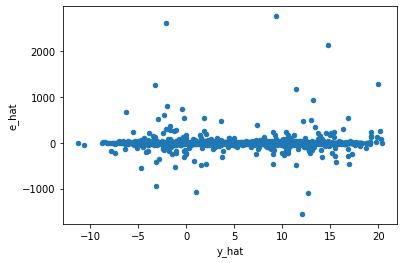

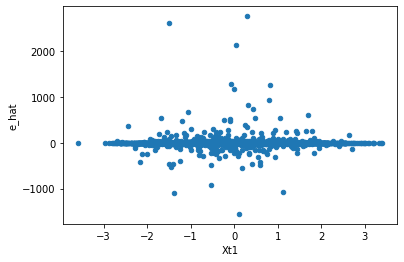

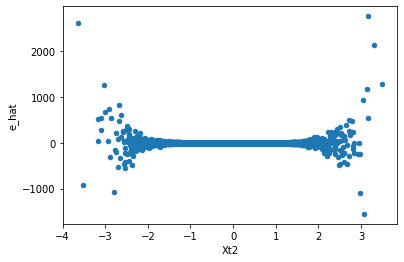

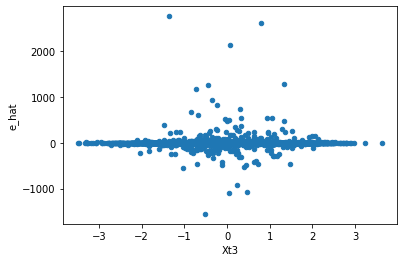

In [14]:
table_data_new.plot(x ='y_hat', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='Xt1', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='Xt2', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='Xt3', y='e_hat', kind = 'scatter')